### **資料前處理**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score, roc_curve, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import Lasso, LassoCV
import statsmodels.api as sm
from scipy.io import arff
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from sklearn.metrics import mean_squared_error, r2_score

# font
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定中文字型 - 微軟正黑體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號'-'顯示為方塊的問題


In [2]:
# run on Kaggle
import os

# 列出 Kaggle input 目錄下的 dataset
os.listdir("/kaggle/input/")
test_file = r"/kaggle/input/wave-2-classes-with-irrelevant-attributes-test/wave_2_classes_with_irrelevant_attributes.test.arff"
train_file = r"/kaggle/input/wave-2-classes-with-irrelevant-attributes-train/wave_2_classes_with_irrelevant_attributes.train.arff"
file = r"/kaggle/input/wave-2-classes-with-irrelevant-attributes/wave_2_classes_with_irrelevant_attributes.arff"

data_file, meta_file = arff.loadarff(file)
df_file = pd.DataFrame(data_file)
# loadarff 函式會回傳兩個值：
# data_file：包含 ARFF 檔案中的資料，以 NumPy array 的形式儲存。
# meta_file：包含 ARFF 檔案的元資料（metadata），如屬性名稱和類型等資訊。

print(f"Nan counts: {df_file.info()}")  # dtype and Nan
print("\n")
print(f"Data statistic:\n{df_file.describe()}")  # statistic
print("\n")

print(f"Data:\n{df_file.head()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33334 entries, 0 to 33333
Columns: 123 entries, v1 to sample
dtypes: float64(121), object(2)
memory usage: 31.3+ MB
Nan counts: None


Data statistic:
                 v1            v2            v3            v4            v5  \
count  33334.000000  33334.000000  33334.000000  33334.000000  33334.000000   
mean      -0.000737      0.506510      0.992686      1.513630      2.011642   
std        1.001741      1.039947      1.152756      1.322462      1.521303   
min       -4.600000     -3.790000     -3.170000     -3.220000     -3.380000   
25%       -0.680000     -0.200000      0.200000      0.590000      0.930000   
50%       -0.010000      0.500000      0.990000      1.520000      2.010000   
75%        0.680000      1.200000      1.780000      2.440000      3.100000   
max        4.500000      5.200000      5.720000      6.230000      7.310000   

                 v6            v7            v8            v9           v10  \
count  3

In [3]:
# train_file = "wave_2_classes_with_irrelevant_attributes.train.arff"
data_train, meta_train = arff.loadarff(train_file)
df_train = pd.DataFrame(data_train)
# loadarff 函式會回傳兩個值：
# data_train：包含 ARFF 檔案中的資料，以 NumPy array 的形式儲存。
# meta_train：包含 ARFF 檔案的元資料（metadata），如屬性名稱和類型等資訊。

print(f"Nan counts: {df_train.info()}")  # dtype and Nan
print("\n")
print(f"Training Data statistic:\n{df_train.describe()}")  # statistic
print("\n")

print(f"Training Data:\n{df_train.head()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 122 entries, v1 to classe
dtypes: float64(121), object(1)
memory usage: 9.3+ MB
Nan counts: None


Training Data statistic:
                 v1            v2            v3            v4            v5  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.015510      0.502448      0.990235      1.526273      2.002926   
std        1.002254      1.034205      1.150970      1.329144      1.541289   
min       -3.850000     -3.490000     -3.070000     -3.180000     -3.280000   
25%       -0.660000     -0.200000      0.210000      0.590000      0.890000   
50%        0.020000      0.490000      0.970000      1.530000      1.990000   
75%        0.700000      1.200000      1.770000      2.440000      3.100000   
max        3.710000      5.200000      5.260000      6.230000      7.160000   

                 v6            v7            v8            v9           v10  \
c

In [4]:
# test_file = "wave_2_classes_with_irrelevant_attributes.test.arff"
data_test, meta_test = arff.loadarff(test_file)
df_test = pd.DataFrame(data_test)
# loadarff 函式會回傳兩個值：
# data_test：包含 ARFF 檔案中的資料，以 NumPy array 的形式儲存。
# meta_test：包含 ARFF 檔案的元資料（metadata），如屬性名稱和類型等資訊。

print(f"Nan counts: {df_test.info()}")  # dtype and Nan
print("\n")
print(f"Testing Data statistic:\n{df_test.describe()}")  # statistic
print("\n")

print(f"Testing Data:\n{df_test.head()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23334 entries, 0 to 23333
Columns: 122 entries, v1 to classe
dtypes: float64(121), object(1)
memory usage: 21.7+ MB
Nan counts: None


Testing Data statistic:
                 v1            v2            v3            v4            v5  \
count  23334.000000  23334.000000  23334.000000  23334.000000  23334.000000   
mean      -0.007700      0.508251      0.993737      1.508212      2.015378   
std        1.001462      1.042415      1.153543      1.319580      1.512675   
min       -4.600000     -3.790000     -3.170000     -3.220000     -3.380000   
25%       -0.680000     -0.200000      0.200000      0.590000      0.940000   
50%       -0.020000      0.510000      0.990000      1.510000      2.010000   
75%        0.670000      1.200000      1.780000      2.440000      3.100000   
max        4.500000      4.540000      5.720000      6.040000      7.310000   

                 v6            v7            v8            v9           v10  \


In [5]:
X_train = df_train.drop(columns=['classe'])
y_train = df_train['classe']

X_test = df_test.drop(columns=['classe'])
y_test = df_test['classe']


### **特徵縮放、Labeling**

- 所有 features 轉換為平均值為0，標準差為1的分佈

- 對於二元分類問題的目標變數 y:
    - Label Encoding 是最合適的：將類別轉換為 0 和 1
    - One-Hot Encoding 不適合：因為是目標變數而非特徵，且是二元分類問題

In [6]:
# 特徵縮放(適用於LASSO和回歸方法) - X Standardization

X_train_columns = X_train.columns.tolist() # 保存 columns name，StandardScaler() 會移除
X_test_columns = X_test.columns.tolist() # 保存 columns name，StandardScaler() 會移除

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# StandardScaler() 跟 LabelEncoder()，經過 fit_transform() 後，都會回傳 NumPy ndarray
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train.columns = X_train_columns # 放回 name
X_test.columns = X_test_columns # 放回 name

print(f"X_train shape：{X_train.shape}")
print(f"X_test shape：{X_test.shape}")
print(f"X_train label:\n{X_train.head()}")
print("\n")
print(f"X_test label:\n{X_test.head()}")


X_train shape：(10000, 121)
X_test shape：(23334, 121)
X_train label:
         v1        v2        v3        v4        v5        v6        v7  \
0 -0.394640 -1.182076  0.269147  1.138931  0.062986  0.517232  0.589884   
1 -0.344750 -0.447176 -0.139224 -0.621689  0.815640 -0.622519 -0.007359   
2  0.463469  0.423102  1.303109  0.973402  0.601523  1.668980 -0.007359   
3  0.553271  0.626166  0.625386  0.695014 -0.910275 -0.268596 -0.647646   
4 -2.001100 -2.294097  0.034551  0.409101  0.919455  0.565222  1.875839   

         v8        v9       v10  ...    alea91    alea92    alea93    alea94  \
0  0.168278 -1.386143  1.034561  ... -0.594646  1.010081 -1.051933 -0.971534   
1  0.150392 -0.962362 -0.716605  ... -1.605570 -1.041996  1.231688  1.145159   
2  1.420278  1.224101  0.588571  ... -1.047819 -0.276815  0.920285  1.526857   
3 -0.910827 -0.722834  0.103230  ...  0.904310 -1.737616  0.020677 -0.728635   
4  0.359059 -1.140473 -0.100089  ... -0.350630 -1.668054 -0.083124 -1.214434   



In [7]:
# y Label Encoding

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# StandardScaler() 跟 LabelEncoder()，經過 fit_transform() 後，都會回傳 NumPy ndarray
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

print(f"y_train shape：{y_train.shape}")
print(f"y_test shape：{y_test.shape}")
print(f"y_train label:\n{y_train.head()}")
print(f"y_test label:\n{y_test.head()}")

y_train shape：(10000, 1)
y_test shape：(23334, 1)
y_train label:
   0
0  0
1  0
2  0
3  0
4  0
y_test label:
   0
0  0
1  0
2  0
3  0
4  0


#### **檢查 outliers**

-  Z-score 方法檢測異常值
    - 假設資料呈常態分佈中，約 99.7% 的資料點位於平均值的三個標準差之內。Z-score 大於 3 的資料點被認為是異常值。
    - 如果資料不呈常態分佈，則 Z-score 可能無法準確地檢測異常值。

In [8]:
z_scores = np.abs((X_train - X_train.mean()) / X_train.std())
outliers = (z_scores > 3).any(axis=1)
print("Outliers counts:", outliers.sum())


Outliers counts: 324


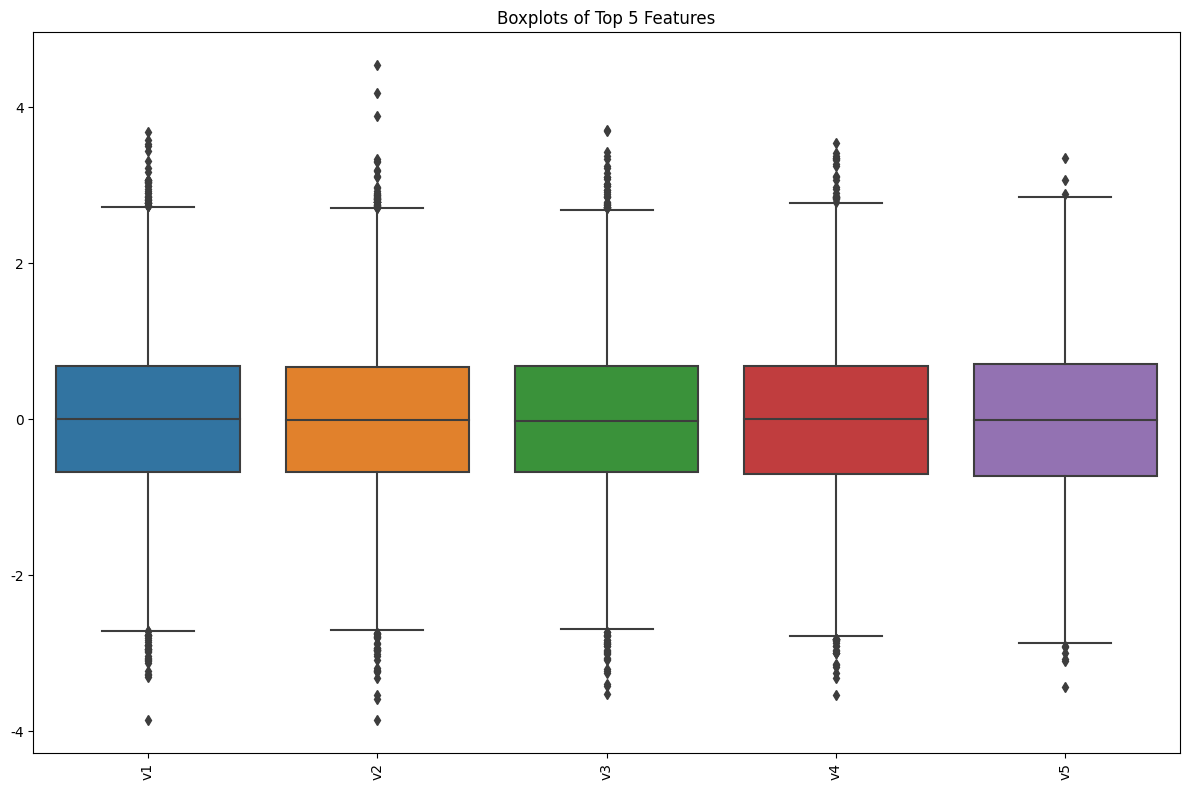

In [9]:
# Boxplots of Top 5 Features

X_train = pd.DataFrame(X_train)
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train.iloc[:, :5])
plt.xticks(rotation=90)
plt.title("Boxplots of Top 5 Features")
plt.tight_layout()
plt.show()


In [10]:
# 異常值數量佔比小於 5%（324/10000 ≈ 3.2%），選擇直接刪除
# Dropping Outliers

X_train = X_train[~outliers]
y_train = y_train[~outliers]
# ~ 會對 List 進行邏輯反轉，即 True 變成 False，False 變成 True
print(f"X_train shape：{X_train.shape}")
print(f"y_train shape：{y_train.shape}")


X_train shape：(9676, 121)
y_train shape：(9676, 1)


### **計算特徵相關性**

- 由於 Wave 資料集包含大量變數(121個)，需要檢查多重共線性（multicollinearity）：

In [11]:
corr_matrix = X_train.corr().abs() # .abs() 只留意大小，不在乎方向

# 找出高度相關的特徵對(相關係數>0.8)
high_corr_var = np.where(np.triu(corr_matrix, k=1) > 0.8) # np.triu(, k=1) 會產生上三角矩陣，為相關係數矩陣上半部分，k=1 表示從主對角線上方開始。
high_corr_pairs = [(corr_matrix.columns[x], corr_matrix.columns[y])
                    for x, y in zip(*high_corr_var)]
print("High corr pairs:", high_corr_pairs)

# corr X features with y
X_train.corrwith(y_train) # 遍歷 121 個 feature，每次取出 9676 個 sample，計算該 feature 與 y_train 的 corr
y_train = y_train.squeeze()  # 降維成 1D (9676, 1) -> (9676,)
corr_y = X_train.corrwith(y_train)
print("X corr with y:\n",corr_y.abs().sort_values(ascending=False))


High corr pairs: []
X corr with y:
 v10       0.640247
v11       0.607504
v17       0.606459
v9        0.599413
v16       0.557382
            ...   
alea37    0.000435
alea56    0.000232
alea95    0.000196
alea85    0.000051
alea9     0.000014
Length: 121, dtype: float64


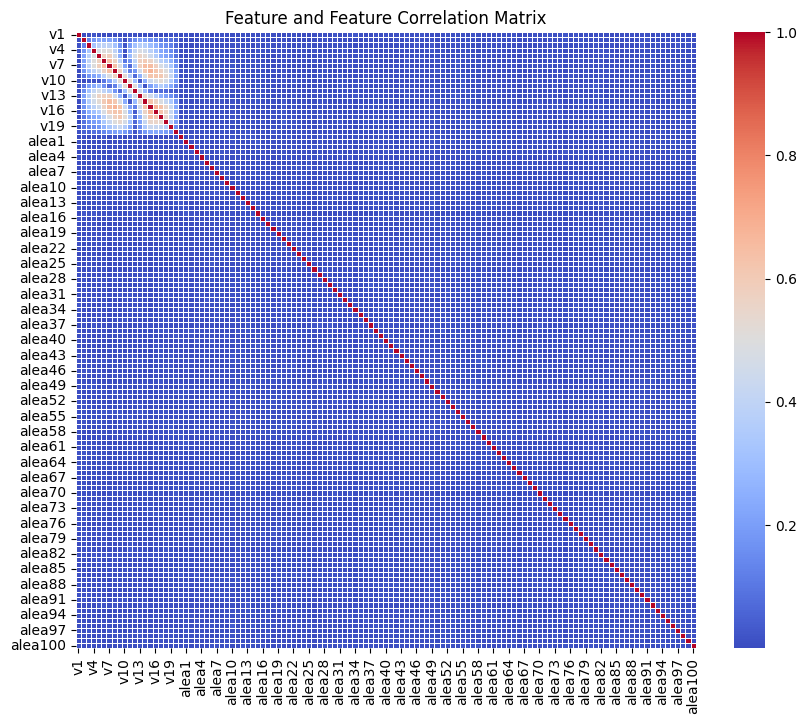

In [12]:
# Pearson Correlation Coefficient Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature and Feature Correlation Matrix")
plt.show()


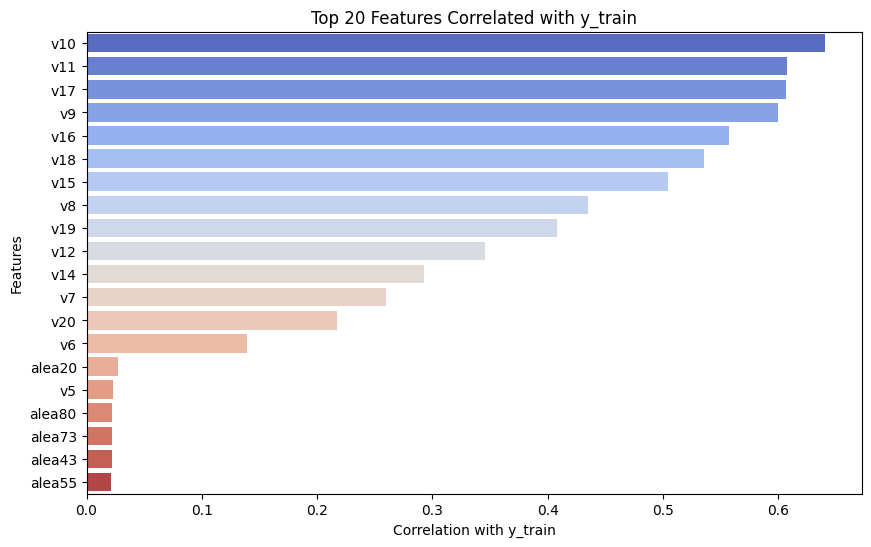

In [13]:
# Top related 20 Features Correlated with y_train

top20_features = corr_y.abs().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top20_features.values, y=top20_features.index, palette="coolwarm")
plt.xlabel("Correlation with y_train")
plt.ylabel("Features")
plt.title("Top 20 Features Correlated with y_train")
plt.show()


 #### **小結論**

- X 沒有任何 feature 間的相關係數絕對值大於 0.8：
    - **特徵之間獨立，多重共線性（multicollinearity）低**、線性相關性相對較低，獨立的特徵可以提供更多的資訊，**有助於模型學習。**
    - 不需要移除任何冗餘特徵。
    - 但是**很多非線性方法並不依賴變數之間的相關性**

- 121 個 X 的feature 對 y 的相關性中**沒有負數**:
    -  因 y 為二元分類標籤 0/1，而 **X 的數據分佈與 y 的標籤方向一致**。
    -  v10 (0.612), v11 (0.583), v17 (0.577) 等特徵與 y 的相關性高，表示這些特徵對分類結果影響很大。

### **使用 Linear / Logit Model + Stepwise / LASSO 選擇 Features**

- **OLS 用於特徵選擇，Logistic Regression 用於分類**
  
**Stepwise 方法比較**
|  | 基於 MSE 的交叉驗證 | 基於 p 值 的 OLS |
|---|---|---|
| **選擇標準** | **最小 MSE**（模型的誤差最小） | **最小 p 值**（統計顯著性） |
| **適用場景** | **預測模型（如機器學習應用）** | **統計分析（如學術研究）** |
| **計算方式** | `cross_val_score()` + MSE 計算 | `OLS()` + p 值計算 |
| **共線性影響** | 影響較小，因為基於 MSE | 影響較大，VIF 高時 p 值可能不可靠 |
| **計算成本** | 高（多次交叉驗證） | 低（每回合僅執行一次 OLS） |
| **過擬合風險** | 低（交叉驗證有助於正則化） | 較高（p 值過於敏感） |

**使用 MSE 方法：**
- 目標是**機器學習預測**
- 擔心**過擬合**，希望使用**交叉驗證**來選擇最佳變數。

**使用 p 值 方法：**
- 目標是**統計推論、學術研究**
- 變數較少（避免共線性影響 p 值）。
- 變數具備統計顯著性（如回歸報告）。


#### **Linear / Logit Model + Forward Selection**

- 從空集開始，**「選擇」哪些特徵不被剃除，也就是選擇重要的特徵**。
- 適用於：希望從一個相對較小的特徵集開始，並逐步加入更多的特徵時。
  
- 優點:
    - 簡單易懂：從空集開始，逐步加入特徵，過程清晰。
    - 計算效率高：每次只考慮單個特徵，因此每次只需計算一次模型，**適合特徵數量較少的情況**。

- 缺點:
    - 可能**忽略交互作用**：如果特徵間有交互作用，某些特徵可能會被遺漏，因為在單獨考慮每個特徵的時候它們可能表現不突出。
    - **容易 Overfitting**：如果資料集比較小，這種方法容易在每次選擇中對訓練集進行過度擬合。
      

In [14]:
# OLS forward_selection based on p-value

def OLS_forward_selection(X, y, significance_level=0.05, verbose=True):
    initial_features = X.columns.tolist()
    best_features = []
    selected_features_log ={}
    counts = 0

    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)

        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[best_features+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]

        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_feature = new_pval.idxmin()
            best_features.append(best_feature)

            selected_features_log[best_feature] = min_p_value
            counts += 1
        else:
            break

    if verbose and selected_features_log:
        print("Selected features by OLS Forward Selection（Good Features）:")
        for feature, p_value in selected_features_log.items():
            print(f"Feature: {feature:<10} P-value: {p_value:.4f}")

    print(f"Sum of added features: {counts}")
    return best_features

OLS_forward_features = OLS_forward_selection(X_train, y_train)
print(f"Selected Features：{OLS_forward_features}")


Selected features by OLS Forward Selection（Good Features）:
Feature: v8         P-value: 0.0000
Feature: v17        P-value: 0.0000
Feature: v12        P-value: 0.0000
Feature: v10        P-value: 0.0000
Feature: v11        P-value: 0.0000
Feature: v9         P-value: 0.0000
Feature: v16        P-value: 0.0000
Feature: v18        P-value: 0.0000
Feature: v5         P-value: 0.0000
Feature: v15        P-value: 0.0000
Feature: v4         P-value: 0.0000
Feature: v19        P-value: 0.0000
Feature: v13        P-value: 0.0000
Feature: v20        P-value: 0.0005
Feature: v3         P-value: 0.0143
Feature: v14        P-value: 0.0137
Feature: alea80     P-value: 0.0250
Feature: v21        P-value: 0.0305
Feature: alea85     P-value: 0.0406
Sum of added features: 19
Selected Features：['v8', 'v17', 'v12', 'v10', 'v11', 'v9', 'v16', 'v18', 'v5', 'v15', 'v4', 'v19', 'v13', 'v20', 'v3', 'v14', 'alea80', 'v21', 'alea85']


In [15]:
# Logit forward_selection based on p-value
def Logit_forward_selection(X, y, significance_level=0.05, verbose=True):
    initial_features = X.columns.tolist()
    best_features = []
    selected_features_log ={}
    counts = 0

    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)

        for new_column in remaining_features:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[best_features+[new_column]]))).fit(disp=0) # disp=0 禁止輸出收斂訊息
            new_pval[new_column] = model.pvalues[new_column]

        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_feature = new_pval.idxmin()
            best_features.append(best_feature)
            selected_features_log[best_feature] = min_p_value
            counts += 1
        else:
            break

    if verbose and selected_features_log:
        print("Selected features by Logit Forward Selection（Good Features）:")
        for feature, p_value in selected_features_log.items():
            print(f"Feature: {feature:<10} P-value: {p_value:.4f}")

    print(f"Sum of added features: {counts}")
    return best_features

Logit_forward_features = Logit_forward_selection(X_train, y_train)
print(f"Selected Features：{Logit_forward_features}")


Selected features by Logit Forward Selection（Good Features）:
Feature: v8         P-value: 0.0000
Feature: v17        P-value: 0.0000
Feature: v10        P-value: 0.0000
Feature: v11        P-value: 0.0000
Feature: v9         P-value: 0.0000
Feature: v12        P-value: 0.0000
Feature: v16        P-value: 0.0000
Feature: v18        P-value: 0.0000
Feature: v15        P-value: 0.0000
Feature: v5         P-value: 0.0000
Feature: v19        P-value: 0.0000
Feature: v4         P-value: 0.0000
Feature: v13        P-value: 0.0000
Feature: v14        P-value: 0.0001
Feature: v20        P-value: 0.0003
Feature: alea14     P-value: 0.0205
Feature: alea81     P-value: 0.0384
Feature: alea23     P-value: 0.0493
Sum of added features: 18
Selected Features：['v8', 'v17', 'v10', 'v11', 'v9', 'v12', 'v16', 'v18', 'v15', 'v5', 'v19', 'v4', 'v13', 'v14', 'v20', 'alea14', 'alea81', 'alea23']


#### **Linear / Logit Model + Backward Elimination**

- 從完整特徵集開始，逐步移除不重要的特徵，**適合擁有較多特徵時**。
- 適用於：**已經有一個完整的特徵集，並且希望從中剔除那些對預測貢獻不大的特徵時**。
- 優點:
    - **避免 Overfitting**：通過移除不重要的特徵，有助於減少過擬合的風險。
    - 直觀且簡單：從全特徵開始，逐步減少，過程比較直接。

- 缺點:
    - 計算開銷較大：每次迭代都需要訓練模型並計算每個特徵的影響，對於特徵數量多的情況，**計算量大**。
    - **可能錯過重要的交互作用**：如果特徵間存在交互作用，可能因為某個單獨的特徵被剔除，而錯過整體效果。

In [16]:
# OLS backward_elimination based on p-value

def OLS_backward_elimination(X, y, significance_level=0.05, verbose=True):
    features = X.columns.tolist()
    selected_features_log ={}
    counts = 0

    while len(features) > 0:
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[features]))).fit()
        pvalues = model.pvalues.iloc[1:]  # exclude intercept
        max_p_value = pvalues.max()
        if max_p_value > significance_level:
            excluded_feature = pvalues.idxmax()
            features.remove(excluded_feature)
            selected_features_log[excluded_feature] = max_p_value
            counts += 1

        else:
            break

    if verbose and selected_features_log:
        print("Selected features by P-value Backward Elimination（Bad Features）:")
        for feature, p_value in selected_features_log.items():
            print(f"Feature: {feature:<10} P-value: {p_value:.4f}")

    print(f"Sum of eliminated features: {counts}")
    return features

OLS_backward_features = OLS_backward_elimination(X_train, y_train)
print(f"Selected Features：{OLS_backward_features}")


Selected features by P-value Backward Elimination（Bad Features）:
Feature: alea93     P-value: 0.9887
Feature: alea30     P-value: 0.9690
Feature: alea59     P-value: 0.9680
Feature: alea32     P-value: 0.9679
Feature: alea36     P-value: 0.9530
Feature: alea71     P-value: 0.9461
Feature: v1         P-value: 0.9190
Feature: alea79     P-value: 0.8823
Feature: alea45     P-value: 0.8810
Feature: alea83     P-value: 0.8654
Feature: alea19     P-value: 0.8624
Feature: alea53     P-value: 0.8305
Feature: alea92     P-value: 0.8283
Feature: alea51     P-value: 0.8159
Feature: alea29     P-value: 0.8048
Feature: alea41     P-value: 0.7849
Feature: alea68     P-value: 0.7717
Feature: alea63     P-value: 0.7621
Feature: alea18     P-value: 0.7493
Feature: alea9      P-value: 0.7454
Feature: alea91     P-value: 0.7360
Feature: alea16     P-value: 0.7226
Feature: alea38     P-value: 0.7196
Feature: alea27     P-value: 0.7152
Feature: alea22     P-value: 0.7108
Feature: alea8      P-value: 0.6847

In [17]:
# Logit backward_elimination based on p-value

def Logit_backward_elimination(X, y, significance_level=0.05, verbose=True):
    features = X.columns.tolist()
    selected_features_log ={}
    counts = 0

    while len(features) > 0:
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[features]))).fit(disp=0) # disp=0 禁止輸出收斂訊息
        pvalues = model.pvalues.iloc[1:]  # exclude intercept
        max_p_value = pvalues.max()
        if max_p_value > significance_level:
            excluded_feature = pvalues.idxmax()
            features.remove(excluded_feature)
            selected_features_log[excluded_feature] = max_p_value
            counts += 1

        else:
            break

    if verbose and selected_features_log:
        print("Selected features by Logit Backward Elimination（Bad Features）:")
        for feature, p_value in selected_features_log.items():
            print(f"Feature: {feature:<10} P-value: {p_value:.4f}")

    print(f"Sum of eliminated features: {counts}")
    return features

Logit_backward_features = Logit_backward_elimination(X_train, y_train)
print(f"Selected Features：{Logit_backward_features}")


Selected features by Logit Backward Elimination（Bad Features）:
Feature: alea2      P-value: 0.9917
Feature: alea31     P-value: 0.9838
Feature: alea74     P-value: 0.9729
Feature: alea60     P-value: 0.9699
Feature: alea93     P-value: 0.9649
Feature: alea8      P-value: 0.9564
Feature: alea91     P-value: 0.9563
Feature: alea82     P-value: 0.9368
Feature: alea32     P-value: 0.9349
Feature: alea49     P-value: 0.9325
Feature: alea89     P-value: 0.9292
Feature: alea52     P-value: 0.9282
Feature: alea79     P-value: 0.9236
Feature: alea72     P-value: 0.9190
Feature: alea87     P-value: 0.9120
Feature: alea57     P-value: 0.9099
Feature: alea20     P-value: 0.9050
Feature: alea62     P-value: 0.9005
Feature: alea50     P-value: 0.8912
Feature: alea40     P-value: 0.8918
Feature: v1         P-value: 0.8575
Feature: alea67     P-value: 0.8497
Feature: alea33     P-value: 0.8465
Feature: alea98     P-value: 0.8475
Feature: alea100    P-value: 0.8462
Feature: alea68     P-value: 0.8387
F

#### **變數選擇比較與整合 - 文氏圖（Venn diagram）**

OLS Forward Features: ['v8', 'v17', 'v12', 'v10', 'v11', 'v9', 'v16', 'v18', 'v5', 'v15', 'v4', 'v19', 'v13', 'v20', 'v3', 'v14', 'alea80', 'v21', 'alea85'] Sum of Features: 19

OLS Backward Features: ['v3', 'v4', 'v5', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'alea80', 'alea85'] Sum of Features: 19

All OLS selected features: {'v21', 'v8', 'v14', 'v9', 'v11', 'v17', 'v18', 'v15', 'alea80', 'v20', 'v3', 'alea85', 'v4', 'v13', 'v10', 'v12', 'v16', 'v19', 'v5'} Sum of Features: 19

Logit Forward Features: ['v8', 'v17', 'v10', 'v11', 'v9', 'v12', 'v16', 'v18', 'v15', 'v5', 'v19', 'v4', 'v13', 'v14', 'v20', 'alea14', 'alea81', 'alea23'] Sum of Features: 18

Logit Backward Features: ['v4', 'v5', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'alea14', 'alea23', 'alea81'] Sum of Features: 18

All Logit selected features: {'alea23', 'v8', 'v14', 'v4', 'v9', 'v16', 'v13', 'v10', 'v12', 'alea14', 'v

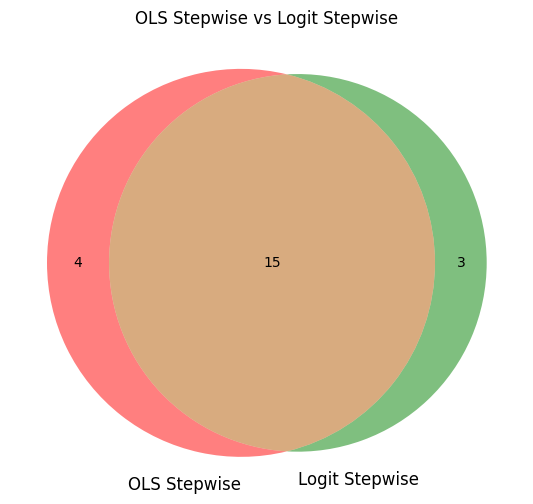

In [18]:
# OLS selected feature
OLS_selected_features = OLS_backward_features + OLS_forward_features
print(f"OLS Forward Features: {OLS_forward_features} Sum of Features: {len(OLS_forward_features)}\n")
print(f"OLS Backward Features: {OLS_backward_features} Sum of Features: {len(OLS_backward_features)}\n")
print(f"All OLS selected features: {set(OLS_selected_features)} Sum of Features: {len(set(OLS_selected_features))}\n")

# Logit selected feature
Logit_selected_features = Logit_backward_features + Logit_forward_features
print(f"Logit Forward Features: {Logit_forward_features} Sum of Features: {len(Logit_forward_features)}\n")
print(f"Logit Backward Features: {Logit_backward_features} Sum of Features: {len(Logit_backward_features)}\n")
print(f"All Logit selected features: {set(Logit_selected_features)} Sum of Features: {len(set(Logit_selected_features))}")

# OLS Forward + Backward vs. Logit Forward + Backward
plt.figure(figsize=(10, 6))
venn2(
    [set(OLS_selected_features), set(Logit_selected_features)],
    ('OLS Stepwise', 'Logit Stepwise'),
    alpha=0.5  # 設定透明度為 0.5（50%）
)
plt.title('OLS Stepwise vs Logit Stepwise')
plt.show()


#### **小結論**

**Forward Selection vs. Backward Elimination**
|  | **Forward Selection** | **Backward Elimination** |
|---|-----------------------|--------------------------|
| **起始點** | 空的特徵集 | 完整特徵集（所有特徵） |
| **操作方式** | 從未選擇的特徵中選擇最有用的 | 從所有特徵中移除最不重要的 |
| **停止條件** | 沒有新特徵可以顯著改善模型 | 移除特徵後模型表現不再提高或達到某閾值 |
| **計算成本** | 計算較少，因為每次只評估一個特徵 | 計算量較大，每次都需要訓練完整模型並評估所有特徵 |
| **優點** | 簡單且計算效率較高 | 可以確保所有特徵都被考慮，減少過擬合 |
| **缺點** | 容易錯過特徵之間的交互作用 | 計算量大，對於特徵數多的情況，可能不切實際 |


#### **LassoCV / Logit Model + LASSO**

- **LassoCV = Linear Model + Cross-val + LASSO**
- **LASSO（L1 正則化）是一種稀疏性特徵選擇方法**：
    - 自動選擇特徵（L1 正則化會讓不重要的特徵權重變成 0）。
    - 處理高維度數據集時非常有用（可以處理比樣本數還多的特徵）。
    - 比 Forward/Backward Selection 更穩定（**避免 Overfitting**）。
    - 透過交叉驗證，LassoCV 可以找到在未知資料上表現最佳的 alpha 值。
自動選擇 alpha：
LassoCV 會自動嘗試不同的 alpha 值，並使用交叉驗證來評估每個 alpha 值的效能。
這使得使用者不需要手動調整 alpha 值。
  

In [20]:
# LassoCV

lasso_cv = LassoCV(cv=5, random_state=2024, max_iter=10000)  # 5-fold cv

# training - LassoCV 會自動嘗試不同的 alpha 值，並使用 CV 評估每個 alpha 值的效能。
lasso_cv.fit(X_train, y_train)
print(f"Best alpha: {lasso_cv.alpha_}")

# training - 使用最佳 alpha
lasso_best = Lasso(alpha=lasso_cv.alpha_)
lasso_best.fit(X_train, y_train)

# get coef
lasso_coef = pd.Series(lasso_best.coef_, index=X_train.columns) # lasso.coef_ 儲存 Lasso 模型中每個特徵的係數

# 找出被選擇的重要特徵（權重不為 0）
lassoCV_features = X_train.columns[lasso_coef != 0]

print(f"Selected features by LassoCV（Good Features）: {list(lassoCV_features)}")
print(f"Sum of Features:{len(lassoCV_features)}")


Best alpha: 0.0039038738685120066
Selected features by LassoCV（Good Features）: ['v3', 'v4', 'v5', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'alea1', 'alea14', 'alea24', 'alea26', 'alea43', 'alea54', 'alea55', 'alea66', 'alea70', 'alea73', 'alea80', 'alea81', 'alea84', 'alea85', 'alea94', 'alea99']
Sum of Features:33


In [21]:
# LogisticRegressionCV = Logit + CV + LASSO

logit_lasso_cv = LogisticRegressionCV(
    penalty='l1',  # LASSO
    solver='liblinear',  # L1 需要用 'liblinear' 或 'saga'
    cv=5,  # 5-fold
    scoring='accuracy',
    random_state=2024
)

# 自動嘗試不同的 C 值，並使用 CV 評估每個 C 的效能
logit_lasso_cv.fit(X_train, y_train)

print(f"Best C: {logit_lasso_cv.C_}")

# 找出係數不為 0 的特徵（這些特徵被 LASSO 選中）
logit_lasso_features = X_train.columns[logit_lasso_cv.coef_.flatten() != 0] # .flatten() 將係數矩陣轉換為一維陣列

print(f"Selected features by LogisticRegressionCV（Good Features）: {list(logit_lasso_features)}")
print(f"Sum of Features:{len(logit_lasso_features)}")


Best C: [0.04641589]
Selected features by LogisticRegressionCV（Good Features）: ['v3', 'v4', 'v5', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'alea1', 'alea5', 'alea7', 'alea10', 'alea13', 'alea14', 'alea15', 'alea17', 'alea19', 'alea22', 'alea23', 'alea24', 'alea26', 'alea28', 'alea29', 'alea30', 'alea34', 'alea36', 'alea43', 'alea54', 'alea55', 'alea59', 'alea65', 'alea66', 'alea69', 'alea70', 'alea73', 'alea75', 'alea76', 'alea80', 'alea81', 'alea83', 'alea88', 'alea94', 'alea97', 'alea99']
Sum of Features:53


#### **變數選擇比較與整合 - 文氏圖（Venn diagram）**

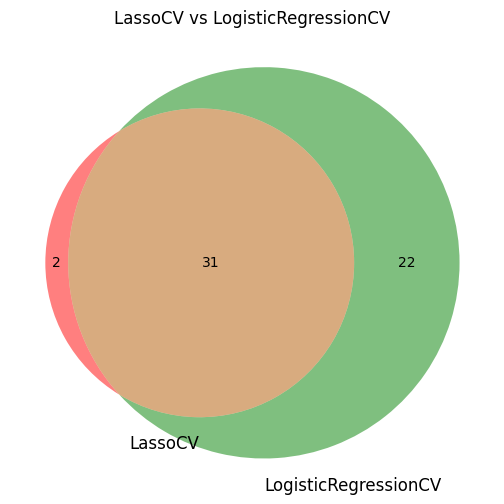

In [22]:
lassoCV_features = set(lassoCV_features)
logit_lasso_features = set(logit_lasso_features)

# LassoCV vs. LogisticRegressionCV
plt.figure(figsize=(10, 6))
venn2(
    [set(lassoCV_features), set(logit_lasso_features)],
    ('LassoCV', 'LogisticRegressionCV'),
    alpha=0.5  # 設定透明度為 0.5（50%）
)
plt.title('LassoCV vs LogisticRegressionCV')
plt.show()


#### **小結論**



In [23]:
# 交集所有 features
common_features = set(OLS_selected_features).intersection(set(Logit_selected_features)).intersection(
    lassoCV_features).intersection(logit_lasso_features)
print(f"All selected common features:\n{common_features}")
print(f"Sum of common features: {len(common_features)}")


All selected common features:
{'v8', 'v14', 'v4', 'v9', 'v16', 'v13', 'v10', 'v12', 'v15', 'v19', 'v11', 'v5', 'v20', 'v17', 'v18'}
Sum of common features: 15


### **初步模型訓練與評估（未選擇 features）**

Accuracy: 0.9221
Precision: 0.9135
Recall: 0.9311
F1 Score: 0.9222
AUC: 0.9803


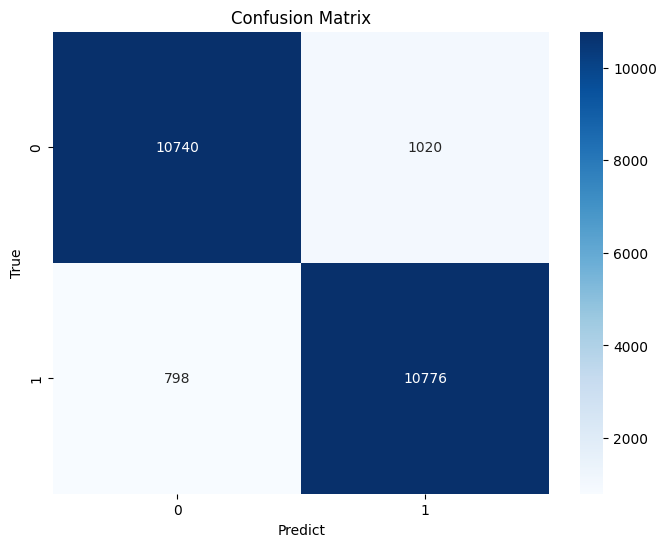

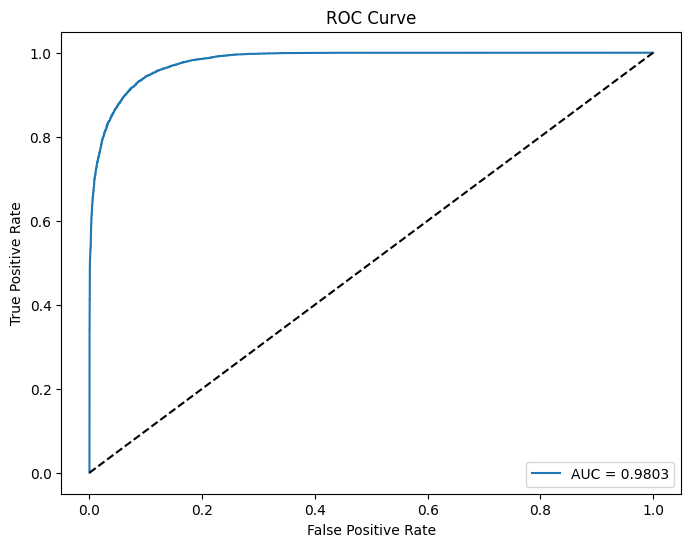

Detail class report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     11760
           1       0.91      0.93      0.92     11574

    accuracy                           0.92     23334
   macro avg       0.92      0.92      0.92     23334
weighted avg       0.92      0.92      0.92     23334



In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # y_prob 用於儲存模型預測的機率值

'''
.predict_proba 會回傳一個形狀為 (n_samples, 2) 的陣列，n_samples 是 X_test sample 的數量。
陣列中的每一 row 包含兩個機率值：
第一個值是樣本屬於類別 0 的機率
第二個值是樣本屬於類別 1 的機率
'''

# evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_prob):.4f}")

# confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Detail class report
print("Detail class report:")
print(classification_report(y_test, y_pred))


### **比較模型訓練與評估（選擇的 15 個 features）**

Accuracy: 0.9238
Precision: 0.9152
Recall: 0.9327
F1 Score: 0.9239
AUC: 0.9812


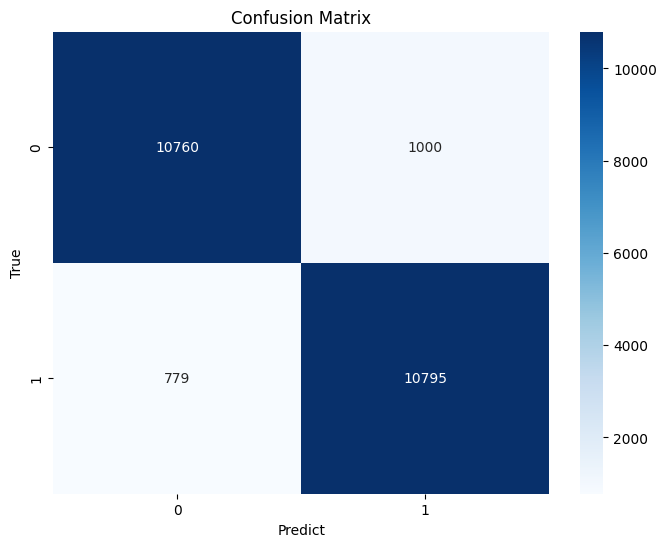

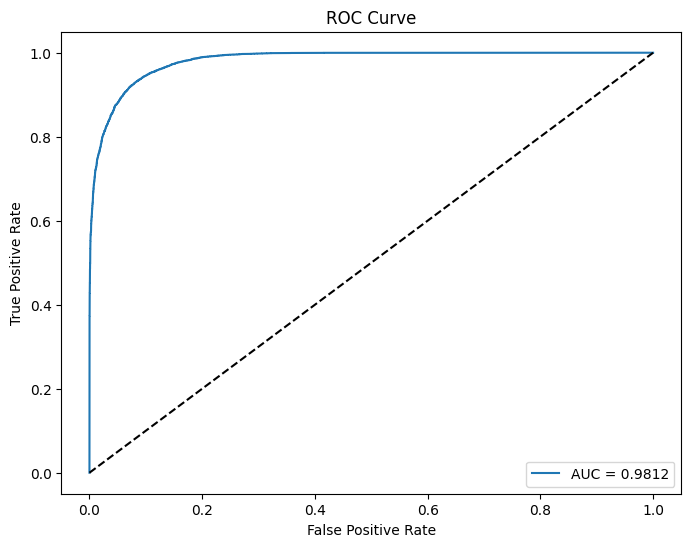

Detail class report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     11760
           1       0.92      0.93      0.92     11574

    accuracy                           0.92     23334
   macro avg       0.92      0.92      0.92     23334
weighted avg       0.92      0.92      0.92     23334



In [25]:
# 用 common_features_list 的值去對應 X_train.columns 中的 index 再去找到相對應的 X_train
common_features_list = list(common_features)

X_train_common = X_train.loc[:,common_features_list]
X_test_common = X_test.loc[:, common_features_list]

model = LogisticRegression()
model.fit(X_train_common, y_train)

y_pred = model.predict(X_test_common)
y_prob = model.predict_proba(X_test_common)[:, 1] # y_prob 用於儲存模型預測的機率值

'''
.predict_proba 會回傳一個形狀為 (n_samples, 2) 的陣列，n_samples 是 X_test sample 的數量。
陣列中的每一 row 包含兩個機率值：
第一個值是樣本屬於類別 0 的機率
第二個值是樣本屬於類別 1 的機率
'''

# evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_prob):.4f}")

# confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Detail class report
print("Detail class report:")
print(classification_report(y_test, y_pred))


#### **Result**

- **第一個模型**使用**全部 121 個特徵**進行訓練。  
- **第二個模型**透過**特徵選擇（Feature Selection）**，只使用**15 個特徵**進行訓練。  

**Feature Selection 有效，減少特徵數量並沒有降低模型效能**：  
- 使用 **15 個特徵的模型** 取得與 **121 個特徵的模型** 幾乎相同的準確率、精確率、召回率和 AUC，甚至略微提升。
- 並**減少了 87.6%（106 個特徵）**，代表大量的特徵可能包含冗餘信息，甚至可能帶來噪聲，影響模型泛化能力。

**計算效率提升**：  
- **第二個模型更輕量級**，訓練與預測速度更快，適合 **大規模數據處理或即時預測應用**。  
- **記憶體與存儲需求大幅降低**，適合部署到資源有限的環境。  


**🔹指標比較與分析**
| 指標 | Model 1（121 特徵） | Model 2（15 特徵） | 差異 |
|------|-----------------|----------------|------|
| **Accuracy** | 0.9221 | 0.9238 | **+0.0017** ↑ |
| **Precision** | 0.9135 | 0.9152 | **+0.0017** ↑ |
| **Recall** | 0.9311 | 0.9327 | **+0.0016** ↑ |
| **F1 Score** | 0.9222 | 0.9239 | **+0.0017** ↑ |
| **AUC-ROC** | 0.9803 | 0.9812 | **+0.0009** ↑ |


**為什麼少特徵的模型仍然表現良好？**
1. **過多特徵可能導致 Overfitting**
   - 原始 121 個特徵中，可能有**許多相關性低的特徵**或**高共線性特徵**，這可能讓模型在訓練集表現很好，但在測試集泛化能力下降。
   - **LASSO 或其他特徵選擇技術** 可能去除了影響泛化能力的噪聲變數，使得 Model 2 更具穩定性。

2. **高維度可能影響模型的學習**
   - 在**高維數據（121 維）** 下，**模型可能難以識別真正影響 y 的關鍵特徵**，導致 noise 影響學習。
   - **降維（使用 15 個最佳特徵）後，模型更容易學習重要模式**，減少不必要的計算，甚至提升準確度。

3. **少量高影響力特徵已經足夠**
   - 只要少數關鍵特徵能夠有效區分目標類別，增加更多特徵的**邊際效益（Marginal Gain）就會遞減**。
   - **第二個模型的 15 個特徵可能已經包含了所有關鍵資訊**，而其他特徵只是額外噪聲。
